<a href="https://colab.research.google.com/github/NytKing/DC-vs-MARVEL/blob/main/DC_vs_MARVEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import files
uploaded=files.upload()

Saving mdc.csv to mdc (1).csv


In [55]:
import pandas as pd
import numpy as np
import io
dcm= pd.read_csv(io.BytesIO(uploaded['mdc.csv']))
#col= (dcm.columns.str.strip().str.upper()
           #   .str.replace(' ', '_')
           #   .str.replace('(', '')
           #   .str.replace(')', ''))
#col

In [56]:
dcm.shape

(90, 18)

In [57]:
dcm[dcm.columns].isnull().sum()

id                0
title             0
year              0
genre             0
runtime           0
mpa_rating        0
imdb_rating       0
imdb_votes        0
imdb_gross        0
director          0
stars             0
description       0
crit_consensus    0
tomato_meter      0
tomato_review     0
tom_aud_score     0
tom_ratings       0
entity            0
dtype: int64

In [59]:
dcm["crit_consensus"]

0     Find one of these old serials, friend. They're...
1     While it has its moments, Howard the Duck suff...
2     Though some may find the plot a bit lacking, B...
3     Faithful to the comics and filled with action,...
4     Though Blade II offers more of what worked in ...
                            ...                        
85    Aquaman swims with its entertainingly ludicrou...
86    An effortlessly entertaining blend of humor an...
87    Joker gives its infamous central character a c...
88    With a fresh perspective, some new friends, an...
89    Wonder Woman 1984 struggles with sequel overlo...
Name: crit_consensus, Length: 90, dtype: object

In [58]:
! pip install textblob

In [62]:
from textblob import TextBlob
sentiments=[]
for x in dcm['crit_consensus']:
  edu=TextBlob(x)
  senti=edu.sentiment.polarity
  if senti==0:
    sentiments.append(0)
  if senti>0:
    sentiments.append(1)
  if senti<0:
    sentiments.append(-1)
print(sentiments)


[1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 0, 1, 1, 0, -1, 1, -1, -1, 1, 1, -1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1]


In [60]:
ulist=[]
for i in sentiments:
  if i not in ulist:
    ulist.append(i)
ulist

[1, -1, 0]

In [63]:
dcm['Sentiment']=sentiments
dcm.head()

,id,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,description,crit_consensus,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,Sentiment
0,1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",Superhero Captain America battles the evil for...,"Find one of these old serials, friend. They're...",0,1,82,250,MARVEL,1
1,2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",A sarcastic humanoid duck is pulled from his h...,"While it has its moments, Howard the Duck suff...",13,78,38,50000,MARVEL,-1
2,3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...","A half-vampire, half-mortal man becomes a prot...","Though some may find the plot a bit lacking, B...",55,103,78,250000,MARVEL,1
3,4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",In a world where mutants (evolved super-powere...,"Faithful to the comics and filled with action,...",82,174,83,250000,MARVEL,1
4,5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",Blade forms an uneasy alliance with the vampir...,Though Blade II offers more of what worked in ...,57,150,68,250000,MARVEL,1


In [64]:
dcm.shape

(90, 19)

In [65]:
dcm_no_des=dcm.drop(["description","crit_consensus"],axis=1)


In [66]:
dcm_no_des.shape

(90, 17)

In [67]:
dcm_no_des

,id,title,year,genre,runtime,mpa_rating,imdb_rating,imdb_votes,imdb_gross,director,stars,tomato_meter,tomato_review,tom_aud_score,tom_ratings,entity,Sentiment
0,1,Captain America,1944,"Action, Adventure, Sci-Fi",244,Approved,5.5,844,0,Elmer Clifton,"Elmer Clifton,Dick Purcell,Lorna Gray,Lionel A...",0,1,82,250,MARVEL,1
1,2,Howard the Duck,1986,"Action, Adventure, Comedy",110,PG,4.7,44073,16300000,Willard Huyck,"Willard Huyck,Lea Thompson,Jeffrey Jones,Tim R...",13,78,38,50000,MARVEL,-1
2,3,Blade,1998,"Action, Horror, Sci-Fi",120,R,7.1,251243,70090000,Stephen Norrington,"Stephen Norrington,Wesley Snipes,Stephen Dorff...",55,103,78,250000,MARVEL,1
3,4,X-Men,2000,"Action, Adventure, Sci-Fi",104,PG-13,7.4,580354,157300000,Bryan Singer,"Bryan Singer,Patrick Stewart,Hugh Jackman,Ian ...",82,174,83,250000,MARVEL,1
4,5,Blade II,2002,"Action, Fantasy, Horror",117,R,6.7,203813,82350000,Guillermo del Toro,"Guillermo del Toro,Wesley Snipes,Kris Kristoff...",57,150,68,250000,MARVEL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,Aquaman,2018,"Action, Adventure, Fantasy",143,PG-13,6.9,400424,335060000,James Wan,"Jason Momoa,Amber Heard,Willem Dafoe,Patrick W...",65,406,74,25000,DC,1
86,87,Shazam!,2019,"Action, Adventure, Comedy",132,PG-13,7.0,279604,140370000,David F. Sandberg,"Zachary Levi,Mark Strong,Asher Angel,Jack Dyla...",90,409,82,10000,DC,1
87,88,Joker,2019,"Crime, Drama, Thriller",122,R,8.4,1014748,335450000,Todd Phillips,"Joaquin Phoenix,Robert De Niro,Zazie Beetz,Fra...",68,585,88,50000,DC,1
88,89,Birds of Prey,2020,"Action, Adventure, Comedy",109,R,6.1,186805,84160000,Cathy Yan,"Margot Robbie,Rosie Perez,Mary Elizabeth Winst...",79,430,78,10000,DC,1


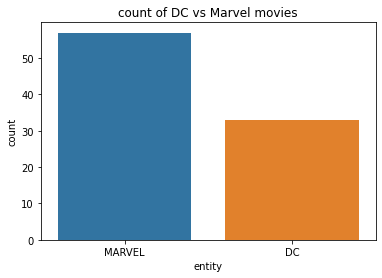

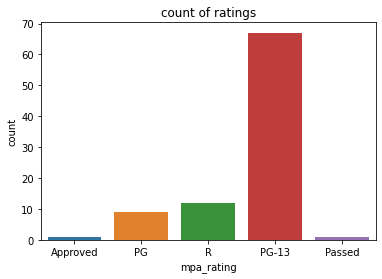

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x="entity",data=dcm_no_des)
plt.title("count of DC vs Marvel movies")
plt.show()

sns.countplot(x="mpa_rating",data=dcm_no_des)
plt.title("count of ratings")
plt.show()

In [69]:
rat=dcm_no_des["mpa_rating"].unique()
rat=rat.tolist()
rat

['Approved', 'PG', 'R', 'PG-13', 'Passed']

In [70]:
profit=[]
pro=dcm_no_des.loc[dcm_no_des["mpa_rating"].isin(['Approved'])]
profit.append(sum(pro['imdb_gross']))
pro=dcm_no_des.loc[dcm_no_des["mpa_rating"].isin(['PG'])]
profit.append(sum(pro['imdb_gross']))
pro=dcm_no_des.loc[dcm_no_des["mpa_rating"].isin(['R'])]
profit.append(sum(pro['imdb_gross']))
pro=dcm_no_des.loc[dcm_no_des["mpa_rating"].isin(['PG-13'])]
profit.append(sum(pro['imdb_gross']))
pro=dcm_no_des.loc[dcm_no_des["mpa_rating"].isin(['Passed'])]
profit.append(sum(pro['imdb_gross']))
profit

[0, 479860000, 1763520000, 16869760000, 0]

Text(0.5, 1.0, 'most profitable movie type')

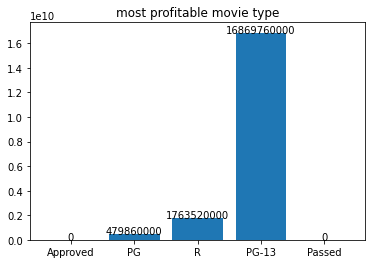

In [71]:
plt.bar(rat,profit)
for continent, ladder in enumerate(profit):
    plt.text(continent, ladder, str(ladder),horizontalalignment='center')
plt.title("most profitable movie type")

In [72]:
gen=dcm_no_des["genre"].unique()
gen

array(['Action, Adventure, Sci-Fi', 'Action, Adventure, Comedy',
       'Action, Horror, Sci-Fi', 'Action, Fantasy, Horror',
       'Action, Crime', 'Action, Sci-Fi, Thriller', 'Action, Sci-Fi',
       'Action, Crime, Drama', 'Action, Adventure, Fantasy',
       'Action, Adventure, Crime', 'Action, Fantasy, Thriller',
       'Action, Drama, Sci-Fi', 'Action, Adventure, Drama',
       'Action, Horror, Mystery', 'Adventure, Comedy, Crime',
       'Horror, Sci-Fi', 'Action, Adventure', 'Action, Crime, Fantasy',
       'Action, Drama, Mystery', 'Action, Drama, Fantasy',
       'Crime, Drama, Thriller'], dtype=object)

In [73]:
#dire=dcm_no_des["director"]
#dire=dcm_no_des.loc[dcm_no_des["director"].isin(['Zack Snyder'])]
#dire
print('Director with max movies is',max(dcm_no_des['director']))

print("Genre with max movies is",max(dcm_no_des['genre']))

print("max profit is",max(dcm_no_des['imdb_gross']))

print("Movie with max profit is",dcm_no_des["title"][53])

print("max runtime is",max(dcm_no_des['runtime']))

print("Movie with max runtime is",dcm_no_des["title"][0])


#dcm_no_des[dcm_no_des['runtime']==244].index
#profit.append(sum(pro['imdb_gross']))
#max(dire)

#gen=dcm_no_des["genre"]
#max(gen)

Director with max movies is Zack Snyder
Genre with max movies is Horror, Sci-Fi
max profit is 858370000
Movie with max profit is Avengers: Endgame
max runtime is 244
Movie with max runtime is Captain America


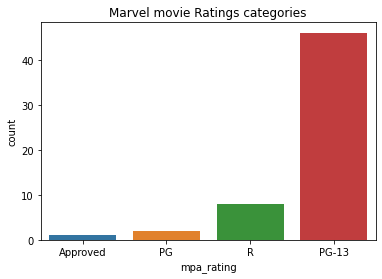

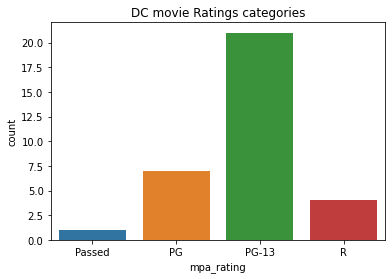

In [74]:
dcm_no_des_ma=dcm_no_des.loc[dcm_no_des["entity"].isin(['MARVEL'])]

sns.countplot(x="mpa_rating",data=dcm_no_des_ma)

plt.title("Marvel movie Ratings categories")
plt.show()

dcm_no_des_dc=dcm_no_des.loc[dcm_no_des["entity"].isin(['DC'])]

sns.countplot(x="mpa_rating",data=dcm_no_des_dc)

plt.title("DC movie Ratings categories")
plt.show()

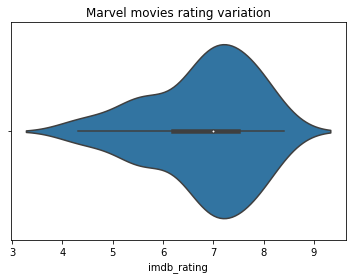

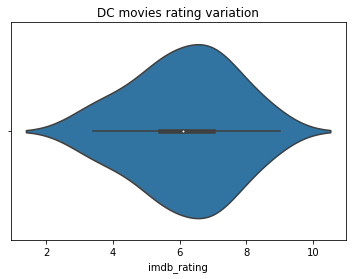

In [81]:
sns.violinplot(x=dcm_no_des_ma["imdb_rating"])
plt.title("Marvel movies rating variation")
plt.show()
sns.violinplot(x=dcm_no_des_dc["imdb_rating"])
plt.title("DC movies rating variation")
plt.show()

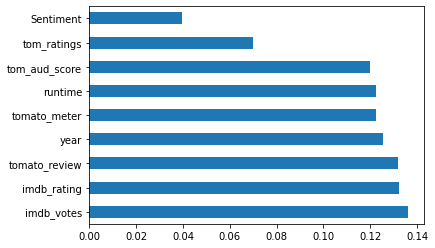

In [76]:
#x=dcm_no_des
y=dcm_no_des["imdb_gross"]
x=dcm_no_des.drop(["imdb_gross","id","title","genre","mpa_rating","director","entity","stars"],axis=1)


from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
important=pd.Series(model.feature_importances_,index=x.columns)
important.nlargest(10).plot(kind="barh")
plt.show()

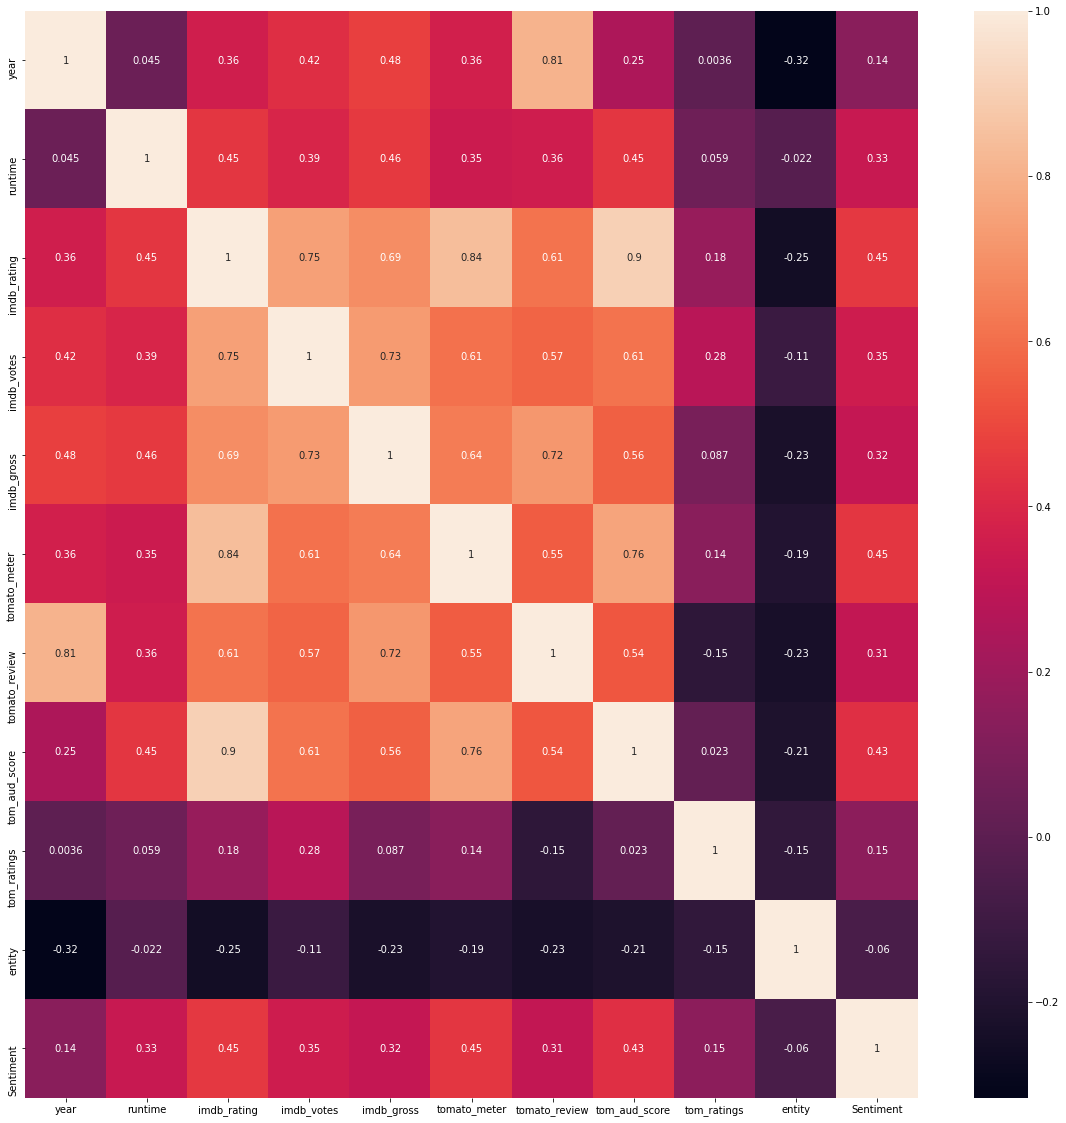

In [86]:
z=dcm_no_des.drop(["id","title","genre","mpa_rating","director","stars"],axis=1)
z=z.replace(to_replace=["MARVEL","DC"],value=[1,2])
co=z.corr()
features=co.index
plt.figure(figsize=(20,20))

heat=sns.heatmap(z[features].corr(),annot=True,)
